## Credit Card Fraud Detection

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a credit card transaction is fraudulant.

We are going to take the following approach:

    1. Problem definition
    2. Data
    3. Evaluation
    4. Features
    5. Modelling
    6. Experimentation


#### 1. Problem Definition

In a statement, Given credit card transaction parameters about a transaction, can we predict whether or not the transaction is fraudulant?

#### 2. Data

The original data came from the Kaggle: https://www.kaggle.com/mlg-ulb/creditcardfraud

#### 3.Evaluation

If we can reach 95% accuracy at predicting or not a transaction is fraudulant during the proof of concept, we'll pursue the project.

#### 4. Features

This is where we will get different information about each of the features in your data.

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

##### Preparing the tools:

We're going to use Pandas, Matplotlib and Numpy for data analysis and manipulation and also scikit-learn to build our machine leanring model.

#####  Import all the tools we need

In [1]:
# Regular EDA(Exploratory Data Analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# We want our plots to appear inside the notebook
%matplotlib inline

In [3]:
# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [5]:
# Load Data
df = pd.read_csv("data/creditcard.csv")
df.shape

(284807, 31)

##### Data Exploration (Exploratory data analysis or EDA)

The goal is to find out more about the data and become a subject matter export on the dataset you're working with.

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat diffrenet types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of your data?

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [8]:
# Let's  find out how many of each class there
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

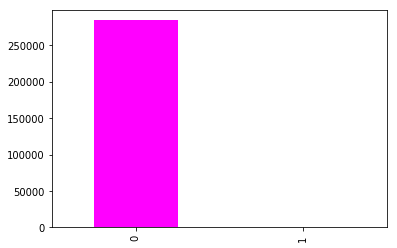

In [9]:
df["Class"].value_counts().plot(kind="bar", color=["magenta", "orange"])

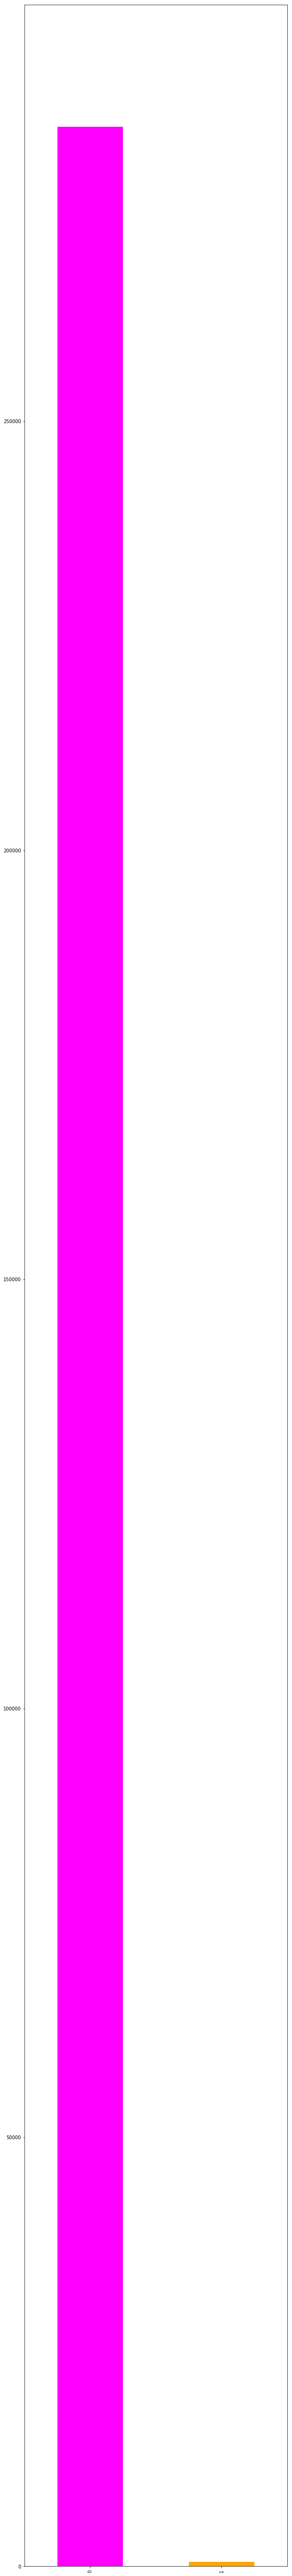

In [10]:
# As the amount of total fraudulant transaction is only 492, but on the other hand the amount of valid transaction 
# is 284315, which is huge and that's why on the previous graph of our valid and fraudulant transaction, 
# graph of fraudulant transaction is going to unvisible, so i make a comperatively large scale of graph to 
# visualize the plot.
df["Class"].value_counts().plot(figsize=(10,100), kind="bar", color=["magenta", "orange"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [12]:
# Are there any missing values?
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Credit-card transaction frequency according to Amount

In [14]:
df["Amount"].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
0.76        2998
10.00       2950
1.29        2892
1.79        2623
0.99        2304
20.00       2002
0.00        1825
8.99        1811
11.50       1741
4.49        1579
5.00        1569
0.77        1443
2.69        1436
25.00       1388
50.00       1341
4.99        1242
2.00        1091
30.00       1012
29.99        975
45.00        949
12.99        941
40.00        912
19.99        897
19.95        878
100.00       877
           ...  
308.57         1
443.71         1
229.42         1
242.24         1
668.87         1
293.85         1
562.28         1
1234.03        1
256.15         1
241.71         1
362.97         1
365.03         1
337.16         1
145.12         1
3783.15        1
617.89         1
508.39         1
511.61         1
167.97         1
167.03         1
133.19         1
254.07         1
108.66         1
308.82         1
154.59         1
192.63         1
218.84         1
195.52        

In [15]:
#Compare Class column with Amount column
pd.crosstab(df["Class"], df["Amount"])

Amount,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,...,8787.0,8790.26,10000.0,10199.44,11789.84,11898.09,12910.93,18910.0,19656.53,25691.16
Class,,,,,,,,,,,,,,,,,,,,,
0,1798,713,85,3,11,44,3,11,10,2,...,1,1,1,1,1,1,1,1,1,1
1,27,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
##### Problem ####
# Create a plot of crosstab
# pd.crosstab(df.Class, df.Amount).plot(kind="bar",
#                                    figsize=(10,6),
#                                    color=["magenta", "orange"])

# plt.title("Credit-card transaction frequency according to Amount")
# plt.xlabel("0 = Valid Transaction, 1 = Fraudulant Transaction")
# plt.ylabel("Amount")
# plt.legend(["Female", "Male"])
# plt.xticks(rotation = 0);

#### Amount vs Time for Credit Card Fraud Detection

In [17]:
# Create another figure
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 8 Text xticklabel objects>)

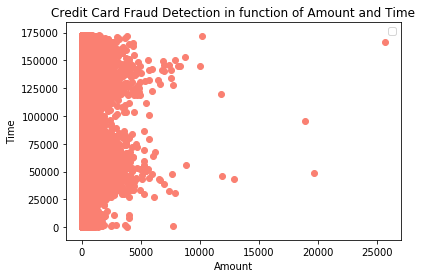

In [18]:
# Add some helpful info
plt.title("Credit Card Fraud Detection in function of Amount and Time")
plt.xlabel("Amount")
plt.ylabel("Time")
plt.legend(["Valid", "Fraudulant"]);

# Scatter with positive examples
plt.scatter(df.Amount[df.Class==1], df.Time[df.Class==1], c="indigo")

# Scatter with negative exapmles
plt.scatter(df.Amount[df.Class==0], df.Time[df.Class==0], c="salmon")

plt.xticks(rotation = 0)

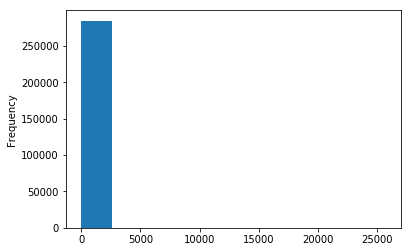

In [19]:
# Check the districution of the Amount column with a histogram
df["Amount"].plot.hist()

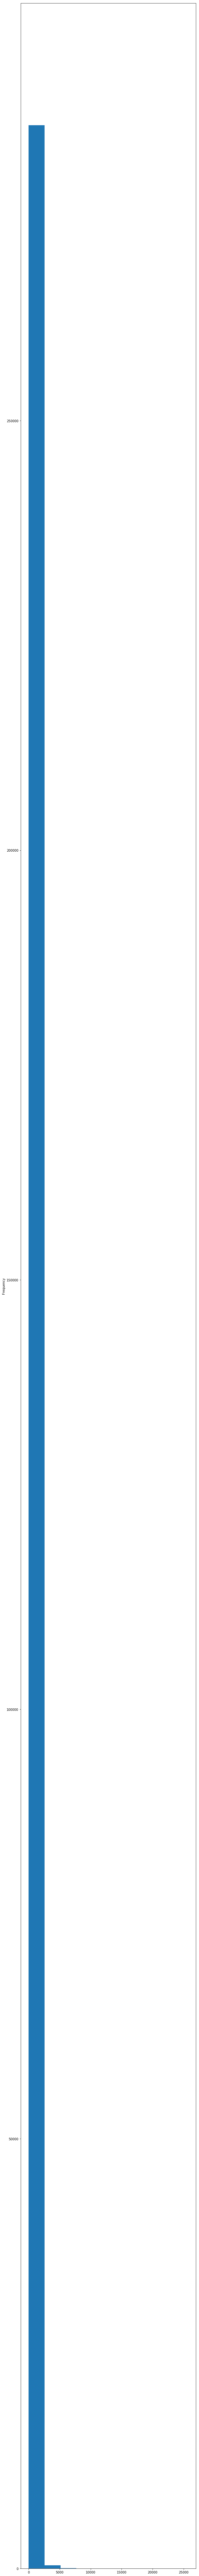

In [20]:
# Check the districution of the Amount column with a histogram
df["Amount"].plot.hist(figsize=(10,150))

#### Make a correlation matrix

In [21]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


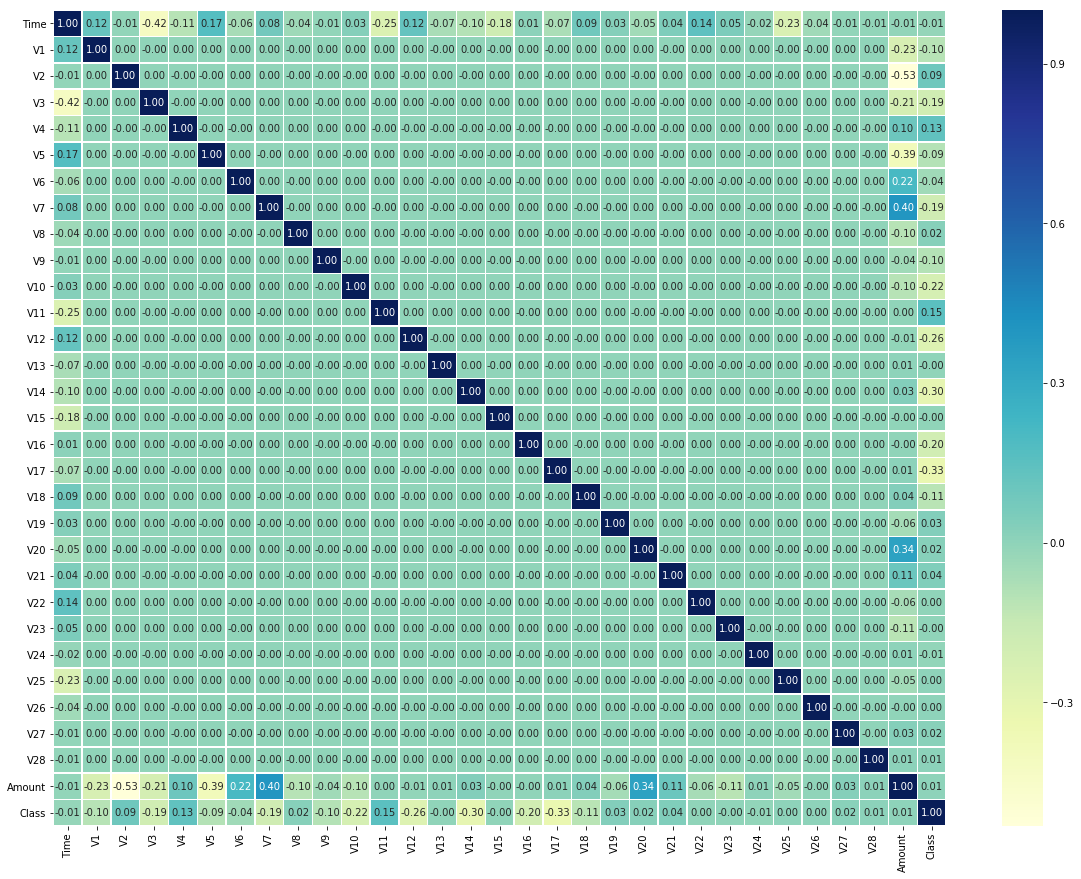

In [22]:
# Let's make our correlation metrix a little prettier
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom+0.5, top=0.5)

### Modelling

In [23]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
# Split data into X and y
X = df.drop("Class", axis=1)
y = df["Class"]

In [25]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [27]:
# Split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [29]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


In [30]:
y_train.head()

223361    0
165061    0
238186    0
150562    0
138452    0
Name: Class, dtype: int64

In [31]:
y_test.head()

43428     1
49906     0
29474     0
276481    0
278846    0
Name: Class, dtype: int64

Now we've got our data split into training and test sets. Its time to build machine learning model.

We'll train it(Find the patterns on the training set), and we will test it (use the patterns) on the test set.

We are going to try 3 different machine learning models:
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier

In [32]:
# Put models into dictionary
models = {"logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

In [33]:
# create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    X_train: training data(No lebels)
    X_test: testing data(No lebels)
    y_train: training labels
    y_test: testing labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # make a dictionary to keep models score
    model_scores = {}
    
    # loop through models
    
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name]= model.score(X_test, y_test)
        
    return model_scores

In [34]:
# Experimanting with machine learning models

model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\Asus\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'logistic Regression': 0.9986657771847899,
 'KNN': 0.9983673326077034,
 'Random Forest': 0.9995611109160493}

#### Model comaprison

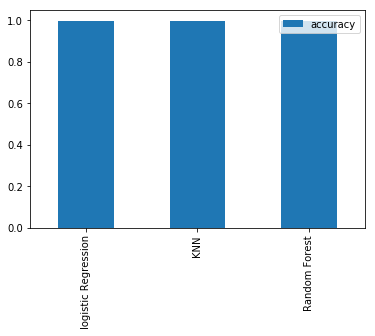

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])

model_compare.T.plot.bar()

### Improving or Tuning our model



Now we've got a baseline model and we know a models first predictions aren't always what we whould based our next steps off. What should do?


lets look at the following:
    1. Hyperparameter tuning
    2. Feature importance
    3. Confusion matrix
    4. Cross validation
    5. Prrecision
    6. Recall
    7. F1 score
    8. Classification report 
    9. ROC Curve
    10. Area under the curve (AUC)

#### Hyperparameter Tuning

In [36]:
# Let's the KNN

train_scores = []
test_scores = []

In [37]:
# Create a list of different values for n_neighbors
neighbors = range(1, 21)
# Setup KNN instance

knn = KNeighborsClassifier()

In [38]:
# Loop through different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm 
    knn.fit(X_train, y_train)
    
    # Update the training scores list 
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [39]:
train_scores

[1.0,
 0.9986306480282648,
 0.9986438148741469,
 0.9984419232372885,
 0.9984507011345433,
 0.9983848669051328,
 0.9983848669051328,
 0.9983321995216046,
 0.9983321995216046,
 0.9983014768812131,
 0.9983058658298405,
 0.9983014768812131,
 0.9983102547784678,
 0.9983014768812131,
 0.9983102547784678,
 0.998288310035331,
 0.9983014768812131,
 0.9982707542408216,
 0.9982707542408216,
 0.9982707542408216]

In [40]:
test_scores

[0.9982795547909132,
 0.9984199992977775,
 0.9984375548611355,
 0.9983673326077034,
 0.9983673326077034,
 0.9983497770443454,
 0.9983673326077034,
 0.9983146659176293,
 0.9983146659176293,
 0.9982971103542713,
 0.9982971103542713,
 0.9982971103542713,
 0.9982971103542713,
 0.9982971103542713,
 0.9982971103542713,
 0.9982795547909132,
 0.9982971103542713,
 0.9982795547909132,
 0.9982795547909132,
 0.9982795547909132]

Maximum KNN score on the test data: 99.84%


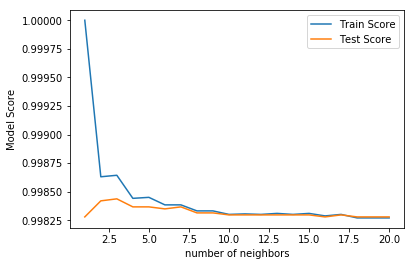

In [41]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")

plt.xlabel("number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

#### Hyperparameter tuning with RnadomizedSearchCV

We are going to tune:

    1. LogisticRegression()
    2. RandomForestClassifier()

In [42]:
# create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

In [43]:
# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

Now we have got hyperparameter grids setup for each of our models, let's tune them using RnadomizedSearchCV

#### Tune LogisticRegression

In [44]:
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

In [45]:
# fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.3min finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.03359818286283781}

In [47]:
# Final Output of the LogisticRegression Model
rs_log_reg.score(X_test, y_test)

0.9989642217618764

Let's do the same for RandomForestClassifier()

In [48]:
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5, 
                          n_iter=20,
                          verbose=True)

In [49]:
# Fit random hyperparameter search model for RandomForestClassifier()

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 510.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [51]:
# Evaluate the RandomizedSearchCV RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.9995259997893332

#### Hyperparameter Tuning with GridSerchCV

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [63]:
# Different hyperparameters for our RandomForestClassifier model

# rf_grid = {"n_estimators": np.arange(10,50),
#           "max_depth": [None, 3,5],
#           "min_samples_split": np.arange(2,20),
#           "min_samples_leaf": np.arange(1,20)}

# rf_grid = {"n_estimators": np.arange(10,1000,50),
#           "max_depth": [None, 3,5,10],
#           "min_samples_split": np.arange(2,20,2),
#           "min_samples_leaf": np.arange(1,20,2)}

In [66]:
# Setup grid hyperparameters search for LogisticReegression

# gs_rf = GridSearchCV(RandomForestClassifier(),
#                          param_grid=rf_grid,
#                          cv=5, 
#                          verbose=True)

In [67]:
# # Fit grid Hyperparameters search model

# gs_rf.fit(X_train, y_train)

#### Evaluating our tuned machine learning calssifier, beyond accuracy

They are:

    1. ROC Curve and AUC Score
    2. Confusion matrix
    3. Classification report
    4. Precision
    5. Recall
    6. F1-score
    ...and it would be great if cross-validation was used where possible

To make comparison and evaluate our trained model, first we need to make predions.

In [68]:
# Make predictions with tuned model

y_preds = rs_rf.predict(X_test)

In [69]:
y_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [70]:
y_preds[:20]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [71]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
101565    0
260880    0
214337    0
201575    0
81055     0
134976    0
237701    0
256836    0
97650     0
158290    0
246697    0
68279     0
267585    0
26525     0
74422     0
206357    0
257395    0
283656    0
231156    0
38442     0
225485    0
92410     0
10828     0
61461     0
134354    0
         ..
97068     0
127928    0
254929    0
203745    0
189799    0
2085      0
15725     0
243506    0
250359    0
49049     0
153683    0
97271     0
171952    0
255048    0
176498    0
145799    0
183815    0
48060     0
163478    0
151081    0
132236    0
83248     0
135640    0
70136     0
235173    0
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

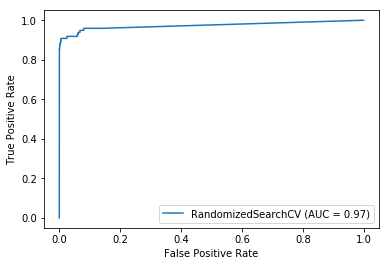

In [72]:
# plot ROC Curve and calculate AUC matrix

plot_roc_curve(rs_rf, X_test, y_test)

In [73]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[56861     3]
 [   24    74]]


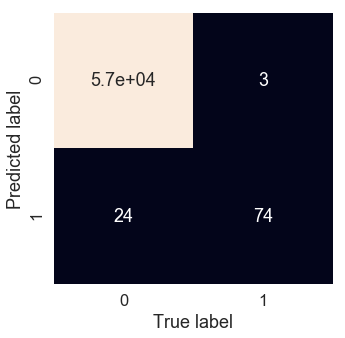

In [75]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(5,5))
    
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom+0.5, top-0.5)
    
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [76]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



#### Calculate evaluation metrics using cross-validation

We've going to calculate precision, recall and f1-score of our model using cross-validation and to do so well be using cross_val_score()

In [78]:
# Check best hyperparameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [83]:
# Create a new classifier with best parameters
clf = RandomForestClassifier()

In [84]:
# cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")

cv_acc

array([0.00617956, 0.99963133, 0.99915732, 0.99959621, 0.99942066])

In [85]:
cv_acc = np.mean(cv_acc)

In [86]:
cv_acc

0.8007970161658277

In [87]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.00174412, 1.        , 0.80487805, 0.97530864, 0.98484848])

In [88]:
cv_precision = np.mean(cv_precision)
cv_precision

0.7533558600389353

In [89]:
# Cross-validated recall 
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall

array([1.        , 0.76767677, 0.67346939, 0.83673469, 0.68367347])

In [90]:
cv_recall = np.mean(cv_recall)
cv_recall

0.7923108637394352

In [91]:
# Cross-validated f1-score 
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.6657768439006206

In [92]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

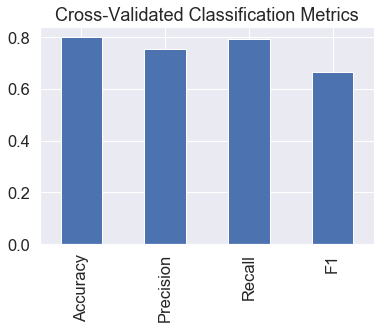

In [93]:
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics", legend=False)

#### Feature Importance

Feature importance is another thing as asking, "Which features contributed most to the outcomes of the model and how did they contribute?" Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance". Let's find the feature importance for our RandomForestClassifier model.

In [94]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [102]:
# Check coef_
# clf.feature_importances_

In [103]:
# Match coef_ of features to columns
# feature_dict = dict(zip(df.columns, list(clf.coef_[0])))

In [104]:
# feature_dict

In [105]:
# Visualize feature importnace 
# feature_df = pd.DataFrame(feature_dict, index=[0])

In [106]:
# feature_df.T.plot.bar(title="Feature Importance", legend=False);

### 6. Experimentation:

If you have not hit your evaluation metric yet, ask yourself:

    1. Could you collect more data?
    2. Could you try a better model? Like CatBoost or XGBoost?
    3. Could you improve the current models? (Beyond what we've done so far)
    4. If your model is good enough (you have hit your evaluation metric) how could you export it and share it with others.



#### Save our build model using joblib

In [109]:
import joblib
joblib.dump(rs_rf, filename="Randomized_Search_Random_Forest_Classifier_Saved_Model_1.joblib")

['Randomized_Search_Random_Forest_Classifier_Saved_Model_1.joblib']